In [1]:
import numpy as np
from fastai.vision.all import *

In [2]:

## data loader

path = untar_data(URLs.PETS)/'images'
print(path)

def my_label_func(x):
    return x[0].isupper() # returns a Boolean

dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    label_func=my_label_func,
    item_tfms=Resize(224), #item transforms = resize images to 224
).cuda()

## get pretrained model - cnn

learn = cnn_learner(dls, resnet34, metrics=error_rate) # fastai's naming conventions say to call the model 'learn'
                                                        # resnet is a state-of-the-art 34 layer CNN for image classification

## fine tune
learn.fine_tune(2) # takes a param for # of epochs



C:\Users\User\.fastai\data\oxford-iiit-pet\images


C:\Users\User\anaconda3\envs\py37_fastai\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\User\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\User\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warning

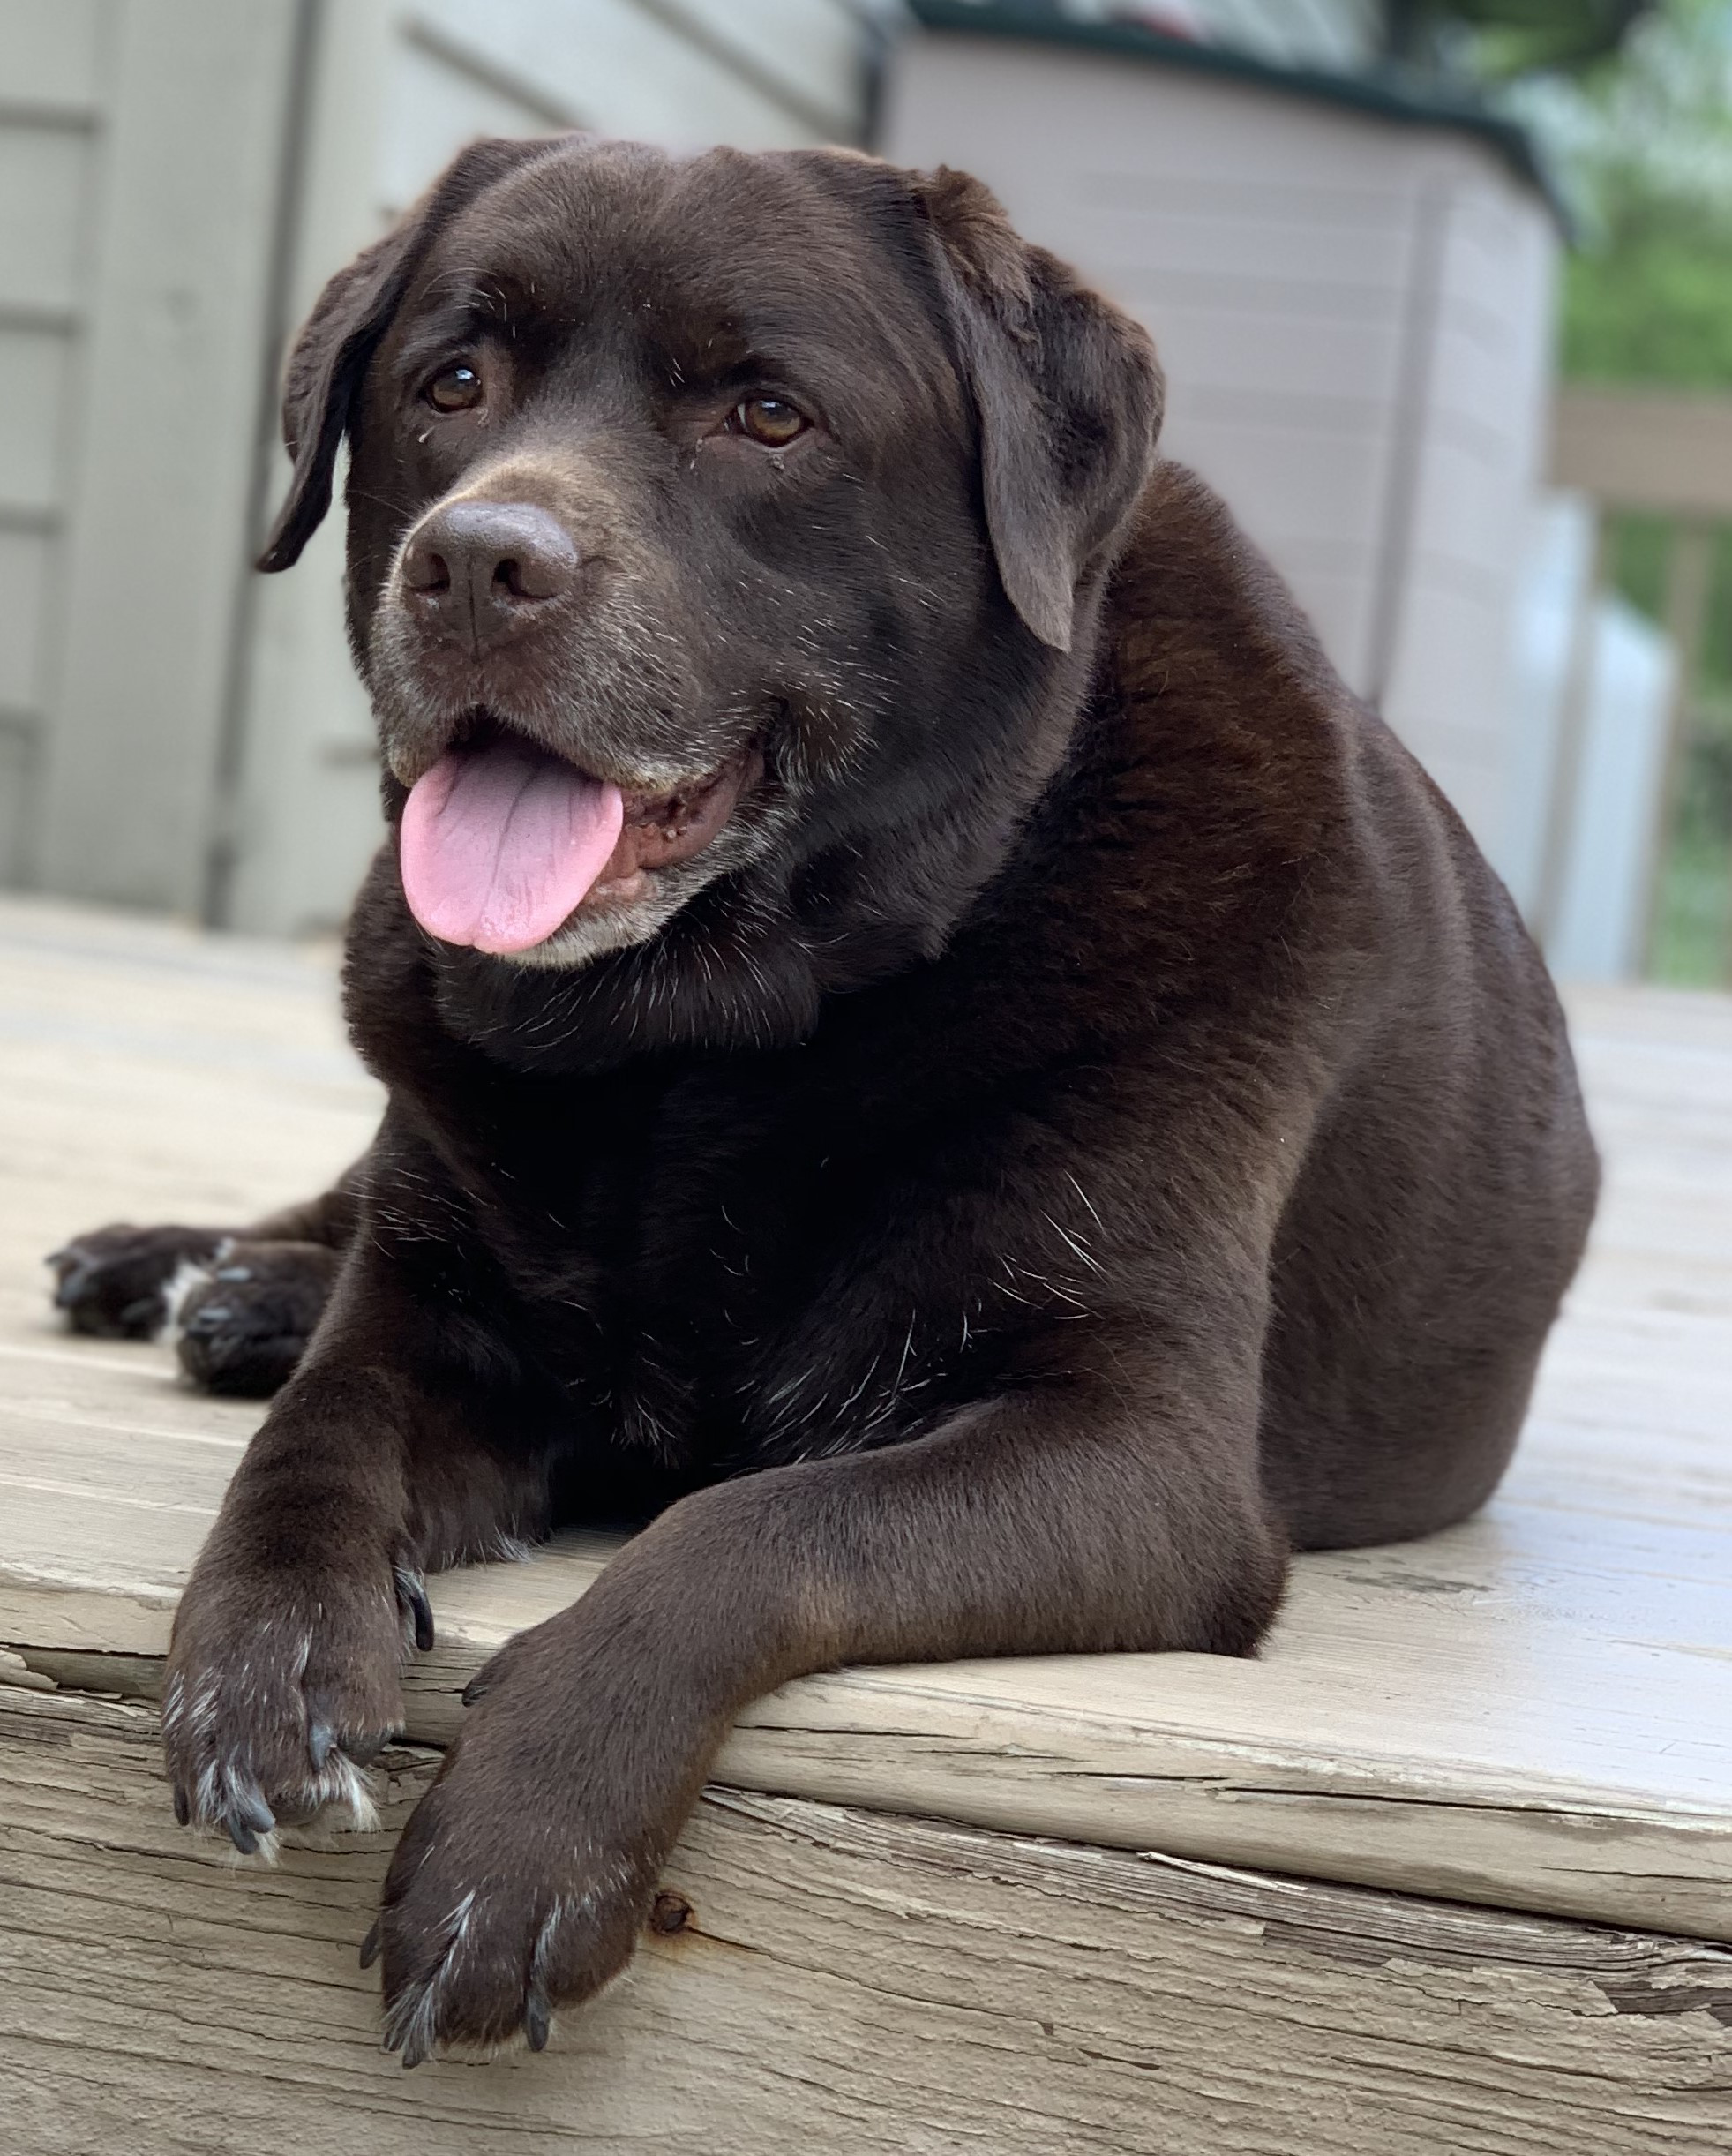

In [10]:
img = PILImage.create('C:/Users/User/.fastai/data/oxford-iiit-pet/images/IMG_1042.jpg')
img

In [12]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
print(f"Probability it's a dog: {1-probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.001076
Probability it's a dog: 0.998924
